Źródło danych: https://www.kaggle.com/datasets/mrdew25/pokemon-database?fbclid=IwAR0n-LMZjqYK-INWhzbKNCaHu0_lLyl6hbwxbQYShmKpKUpaNQh97dskDU0 [13.12.2022]

Baza danych zawiera informacje na temat wszystkich 898 pokemonów wraz z ich różnymi formami od edycji Red/Blue do Sword/Shield

Zbiór danych posada następujące kolumny:

* Pokemon Id
* Pokedex Number
* Pokemon Name
* Classification
* Alternate Form Name
* Original Pokemon ID
* Legendary Type
* Pokemon Height
* Pokemon Weight
* Primary Type
* Secondary Type
* Primary Ability
* Primary Ability Description
* Secondary Ability
* Hidden Ability
* Hidden Ability Description
* Male Ratio
* Female Ratio
* Base Happiness
* Games(s) of Origin
* Region of Origin
* Health Stat
* Attack Stat
* Defense Stat
* Special Attack Stat
* Special Defense Stat
* Speed Stat
* Base Total Stat
* Health EV
* Attack EV
* Defense EV
* Special Attack EV
* Special Defense EV
* Speed EV
* EV Yield Total
* Catch Rate
* Experience Growth
* Experience Growth Total
* Experience Yield
* Primary Egg Group
* Secondary Egg Group
* Egg Cycle Count
* Pre Evolution Pokemon Id
* Evolution Details

Zaimportowanie używanych bibliotek

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf

Wczytanie danych

In [48]:
pokemony = pd.read_csv(r"C:\Users\olaki\Documents\studia\Języki Skryptowe w analizie danych\Pokemon Database.csv",index_col=0)
pd.set_option('display.max_columns', None)

# Zapoznanie się z danymi i przygotowanie ich do analizy

In [49]:
pokemony.head(5)

Pokedex Number  Pokemon Name    Classification  \
Pokemon Id                                                   
1                        1   "Bulbasaur"    "Seed Pokemon"   
2                        2     "Ivysaur"    "Seed Pokemon"   
3                        3    "Venusaur"    "Seed Pokemon"   
4                        3    "Venusaur"    "Seed Pokemon"   
5                        4  "Charmander"  "Lizard Pokemon"   

           Alternate Form Name  Original Pokemon ID Legendary Type  \
Pokemon Id                                                           
1                          NaN                  NaN            NaN   
2                          NaN                  NaN            NaN   
3                          NaN                  NaN            NaN   
4                       "Mega"                  3.0            NaN   
5                          NaN                  NaN            NaN   

            Pokemon Height  Pokemon Weight Primary Type Secondary Type  \
Pokemon Id                                                               
1                      0.7             6.9      "Grass"       "Poison"   
2                      1.0            13.0      "Grass"       "Poison"   
3                      2.0           100.0      "Grass"       "Poison"   
4                      2.4           155.5      "Grass"       "Poison"   
5                      0.6             8.5       "Fire"            NaN   

           Primary Ability                        Primary Ability Description  \
Pokemon Id                                                                      
1               "Overgrow"  "Powers up Grass-type moves when the Pokémon's...   
2               "Overgrow"  "Powers up Grass-type moves when the Pokémon's...   
3               "Overgrow"  "Powers up Grass-type moves when the Pokémon's...   
4              "Thick Fat"  "The Pokémon is protected by a layer of thick ...   
5                  "Blaze"  "Powers up Fire-type moves when the Pokémon's ...   

           Secondary Ability Secondary Ability Description Hidden Ability  \
Pokemon Id                                                                  
1                        NaN                           NaN  "Chlorophyll"   
2                        NaN                           NaN  "Chlorophyll"   
3                        NaN                           NaN  "Chlorophyll"   
4                        NaN                           NaN            NaN   
5                        NaN                           NaN  "Solar Power"   

                                   Hidden Ability Description  \
Pokemon Id                                                      
1           "Boosts the Pokémon's Speed stat in harsh sunl...   
2           "Boosts the Pokémon's Speed stat in harsh sunl...   
3           "Boosts the Pokémon's Speed stat in harsh sunl...   
4                                                         NaN   
5           "Boosts the Sp. Atk stat in harsh sunlight, bu...   

           Special Event Ability Special Event Ability Description  \
Pokemon Id                                                           
1                            NaN                               NaN   
2                            NaN                               NaN   
3                            NaN                               NaN   
4                            NaN                               NaN   
5                            NaN                               NaN   

            Male Ratio  Female Ratio  Base Happiness Game(s) of Origin  \
Pokemon Id                                                               
1                 87.5          12.5              70             "Red"   
2                 87.5          12.5              70             "Red"   
3                 87.5          12.5              70             "Red"   
4                 87.5          12.5              70               "X"   
5                 87.5          12.5              70             "Re

Typy danych kolumn

In [50]:
pokemony.dtypes

Pokedex Number                         int64
Pokemon Name                          object
Classification                        object
Alternate Form Name                   object
Original Pokemon ID                  float64
Legendary Type                        object
Pokemon Height                       float64
Pokemon Weight                       float64
Primary Type                          object
Secondary Type                        object
Primary Ability                       object
Primary Ability Description           object
Secondary Ability                     object
Secondary Ability Description         object
Hidden Ability                        object
Hidden Ability Description            object
Special Event Ability                 object
Special Event Ability Description     object
Male Ratio                           float64
Female Ratio                         float64
Base Happiness                         int64
Game(s) of Origin                     object
Region of 

Sprawdzenie ilość brakujących danych

In [51]:
pokemony.isna().sum()

Pokedex Number                          0
Pokemon Name                            0
Classification                          0
Alternate Form Name                   898
Original Pokemon ID                   898
Legendary Type                        949
Pokemon Height                          0
Pokemon Weight                          0
Primary Type                            0
Secondary Type                        508
Primary Ability                         0
Primary Ability Description             0
Secondary Ability                     540
Secondary Ability Description         540
Hidden Ability                        236
Hidden Ability Description            236
Special Event Ability                1074
Special Event Ability Description    1074
Male Ratio                              0
Female Ratio                            0
Base Happiness                          0
Game(s) of Origin                       0
Region of Origin                        0
Health Stat                       

Usuwanie kolumn z wartością dla pojedynczego pokemona

In [52]:
pokemony = pokemony.drop(['Special Event Ability','Special Event Ability Description'],axis=1)

Zamiana brakujących wartości na wartość "None"

In [53]:
pokemony_noNA = pokemony.fillna("None")
pokemony_noNA.isnull().sum()

Pokedex Number                   0
Pokemon Name                     0
Classification                   0
Alternate Form Name              0
Original Pokemon ID              0
Legendary Type                   0
Pokemon Height                   0
Pokemon Weight                   0
Primary Type                     0
Secondary Type                   0
Primary Ability                  0
Primary Ability Description      0
Secondary Ability                0
Secondary Ability Description    0
Hidden Ability                   0
Hidden Ability Description       0
Male Ratio                       0
Female Ratio                     0
Base Happiness                   0
Game(s) of Origin                0
Region of Origin                 0
Health Stat                      0
Attack Stat                      0
Defense Stat                     0
Special Attack Stat              0
Special Defense Stat             0
Speed Stat                       0
Base Stat Total                  0
Health EV           

Sprawdzenie, czy są zduplikowane wiersze

In [54]:
duplicated_rows = pokemony_noNA.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

Pozbycie się cudzysłowu

In [55]:
pokemony_noNA = pokemony_noNA.replace({'"':''}, regex=True)

# Analiza

Ilość unikalnych nazw pokemonów

In [56]:
pokemony["Pokemon Name"].nunique()

898

Histogramy podstawowych statystyk pokemonów

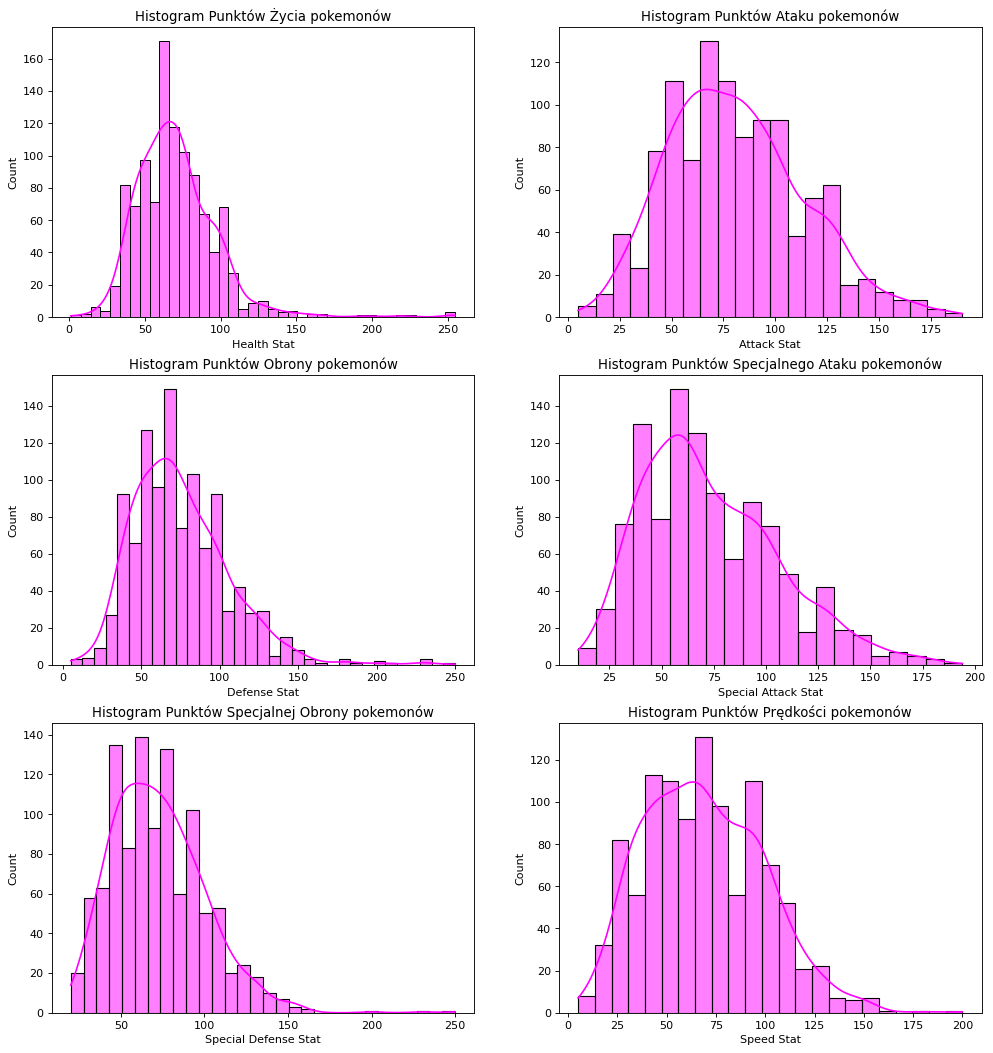

In [57]:
plt.figure(figsize=(15, 16), dpi=80)
plt.subplot(3, 2, 1)
sns.histplot(pokemony_noNA['Health Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Życia pokemonów")
plt.subplot(3, 2, 2)
sns.histplot(pokemony_noNA['Attack Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Ataku pokemonów")
plt.subplot(3, 2, 3)
sns.histplot(pokemony_noNA['Defense Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Obrony pokemonów")
plt.subplot(3, 2, 4)
sns.histplot(pokemony_noNA['Special Attack Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Specjalnego Ataku pokemonów")
plt.subplot(3, 2, 5)
sns.histplot(pokemony_noNA['Special Defense Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Specjalnej Obrony pokemonów")
plt.subplot(3, 2, 6)
sns.histplot(pokemony_noNA['Speed Stat'],kde=True, color="magenta")
plt.title("Histogram Punktów Prędkości pokemonów")

plt.show()

Dzięki histogramom jesteśmy w stanie stwierdzić, że najwięcej pokemonów ma statystyki w pobliżu wartości:
* Punkty Życia : 70
* Punkty Ataku : 65
* Punkty Obrony : 70
* Punkty Ataku Specjalnego : 60
* Punkty Specjalnej Obrony : 60
* Punkty Prędkości: 60

Określenie ilości dodanych pokemonów w danej generacji

In [58]:
pokemony_noNA['Game(s) of Origin'].value_counts()

Black               159
Sword               152
Red                 151
Ruby                138
Diamond             109
X                   108
Sun                 108
Gold                100
Omega Ruby           23
Ultra Sun             9
Platinum              7
Black 2               5
Let's Go Pikachu      4
Fire Red              1
Leaf Green            1
Emerald               1
Name: Game(s) of Origin, dtype: int64

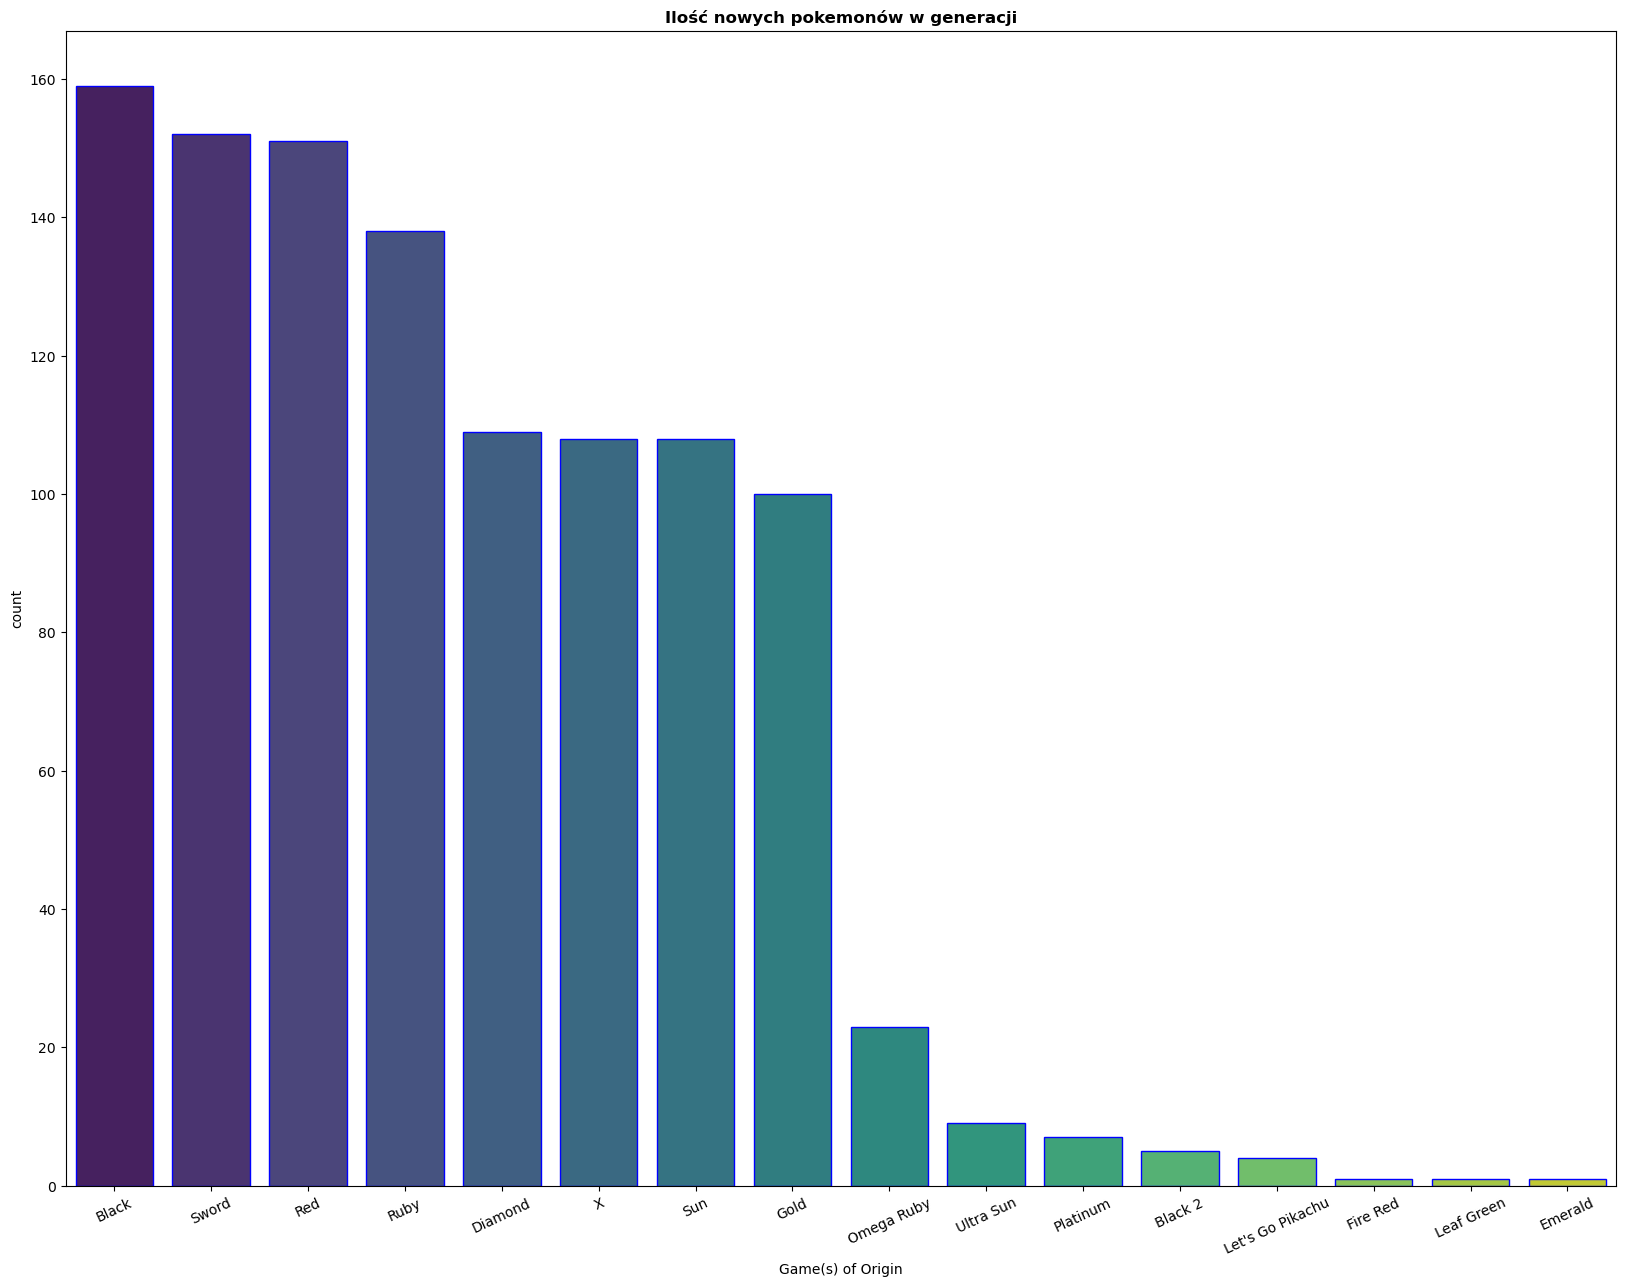

In [59]:
fig, axes = plt.subplots(figsize=(20,15))
sns.countplot(x='Game(s) of Origin',data = pokemony_noNA,palette="viridis",order = pokemony_noNA['Game(s) of Origin'].value_counts().index,ec = "blue")
plt.title("Ilość nowych pokemonów w generacji", fontweight='bold')
plt.xticks(rotation = 25)
plt.show()

Określenie ilości oraz rodzaju pierwszorzędnego i drugorzędnego typu pokemonów

In [60]:
primary_type=pokemony_noNA['Primary Type'].value_counts()
primary_type

Water       138
Normal      118
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     64
Rock         60
Dark         47
Fighting     45
Ghost        44
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          39
Fairy        23
Flying        9
Name: Primary Type, dtype: int64

In [61]:
second_type = pokemony_noNA[pokemony_noNA["Secondary Type"] != "None"]
second_type_value=second_type['Secondary Type'].value_counts()
second_type_value

Flying      114
Psychic      43
Fairy        43
Poison       42
Ground       39
Steel        36
Dragon       35
Fighting     30
Grass        28
Dark         27
Ghost        25
Water        21
Fire         19
Ice          18
Rock         16
Normal       11
Electric     11
Bug          10
Name: Secondary Type, dtype: int64

Sprawdzenie czy wszystkie rodzaje w obu typach są takie same

In [62]:
primary_type.sort_index().index.all()==second_type_value.sort_index().index.all()

True

Wykresy kołowe ilości danego rodzaju pokemonów w dwóch typach

In [63]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Główny typ', 'Drugi typ'])
fig.add_trace(go.Pie(labels=primary_type.index, values=primary_type, scalegroup='one',
                     name="Główny typ"), 1, 1)
fig.add_trace(go.Pie(labels=second_type_value.index, values=second_type_value, scalegroup='one',
                     name="Drugi typ"), 1, 2)

fig.update_layout(title_text='Ilość danego rodzaju pokemonów')
fig.show()

Wykresy kołowe są proporcjonalne do ich całkowitego rozmiaru. Najwięcej w głównym typie jest pokemonów wodnych, normalnych, trawiastych i robaczych, gdzie w drugim typie stanowią one najmniejszą część. Z kolei w drugim typie pierwsze miejsce zajmują pokemony latające, potem psychiczne i baśniowe.

Wykres pokemonów legendarnych na generację.

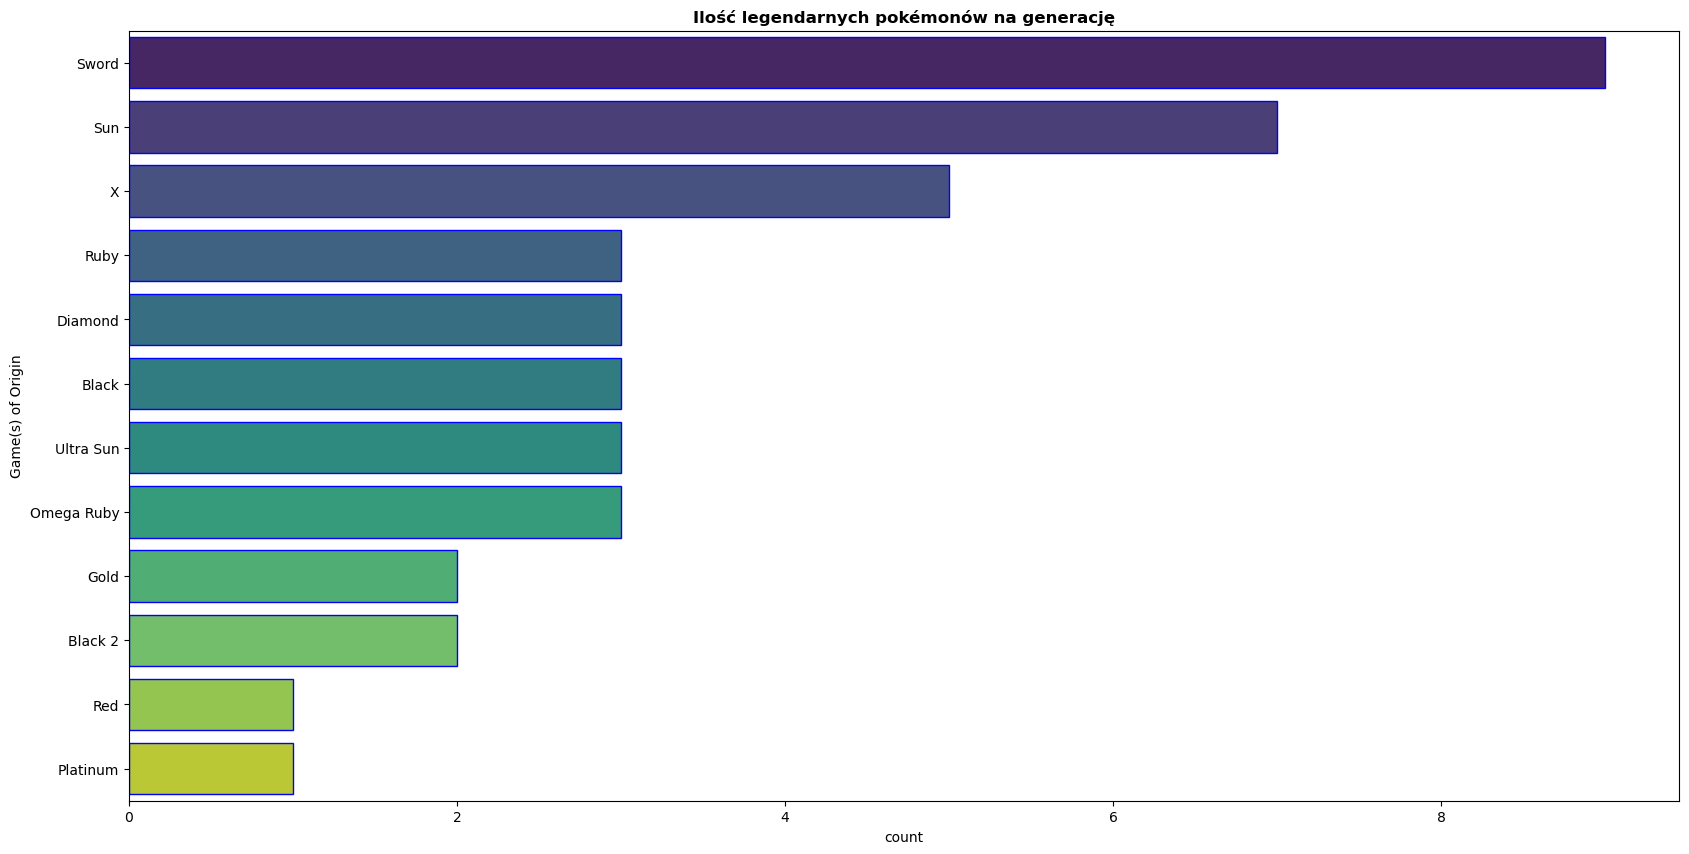

In [64]:
legendary = pokemony_noNA[pokemony_noNA["Legendary Type"] == 'Legendary']
plt.figure(figsize=(20, 10))
plt.title("Ilość legendarnych pokémonów na generację", fontweight='bold')
sns.countplot(data=legendary, y='Game(s) of Origin',palette="viridis",order = legendary['Game(s) of Origin'].value_counts().index,ec = "blue",orient='h')
plt.show()

Mega pokemony

In [65]:
Mega = pokemony_noNA[pokemony_noNA["Alternate Form Name"].str.contains('Mega')]
Mega.head(10)

Pokedex Number Pokemon Name       Classification  \
Pokemon Id                                                     
4                        3     Venusaur         Seed Pokemon   
8                        6    Charizard        Flame Pokemon   
9                        6    Charizard        Flame Pokemon   
13                       9    Blastoise    Shellfish Pokemon   
28                      15     Beedrill   Poison Bee Pokemon   
44                     150       Mewtwo      Genetic Pokemon   
45                     150       Mewtwo      Genetic Pokemon   
79                      18      Pidgeot         Bird Pokemon   
1360                    65     Alakazam          Psi Pokemon   
1367                    80      Slowbro  Hermit Crab Pokemon   

           Alternate Form Name Original Pokemon ID Legendary Type  \
Pokemon Id                                                          
4                         Mega                 3.0           None   
8                       Mega X                 7.0           None   
9                       Mega Y                 7.0           None   
13                        Mega                12.0           None   
28                        Mega                27.0           None   
44                      Mega X                43.0      Legendary   
45                      Mega Y                43.0      Legendary   
79                        Mega                78.0           None   
1360                      Mega              1026.0           None   
1367                      Mega              1330.0           None   

            Pokemon Height  Pokemon Weight Primary Type Secondary Type  \
Pokemon Id                                                               
4                      2.4           155.5        Grass         Poison   
8                      1.7           110.5         Fire         Dragon   
9                      1.7           100.5         Fire         Flying   
13                     1.6           101.1        Water           None   
28                     1.4            40.5          Bug         Poison   
44                     2.3           127.0      Psychic           None   
45                     1.5            33.0      Psychic           None   
79                     2.2            50.5       Normal         Flying   
1360                   1.2            48.0      Psychic           None   
1367                   2.0           120.0        Water        Psychic   

           Primary Ability                        Primary Ability Description  \
Pokemon Id                                                                      
4                Thick Fat  The Pokémon is protected by a layer of thick f...   
8              Tough Claws         Powers up moves that make direct contact.    
9                  Drought  Turns the sunlight harsh when the Pokémon ente...   
13           Mega Launcher                   Powers up aura and pulse moves.    
28            Adaptability   Powers up moves of the same type as the Pokémon.   
44               Steadfast  The Pokémon's determination boosts the Speed s...   
45                Insomnia  The Pokémon is suffering from insomnia and can...   
79                No Guard  The Pokémon employs no-guard tactics to ensure...   
1360                 Trace  When it enters a battle, the Pokémon copies an...   
1367           Shell Armor  A hard shell protects the Pokémon from critica...   

           Secondary Ability Secondary Ability Description Hidden Ability  \
Pokemon Id                                                                  
4                       None                          None           None   
8                       None                          None           None   
9                       None                          None           None   
13                      None                          None           None   
28                      None                          None           None   
44           

In [66]:
Mega["Alternate Form Name"].value_counts()

Mega      44
Mega X     2
Mega Y     2
Name: Alternate Form Name, dtype: int64

Posortowanie według ogólnych statystyk

In [67]:
stat_total_sort=pokemony_noNA.sort_values('Base Stat Total',ascending=False)
stat_total_sort.head(10)

Pokedex Number Pokemon Name     Classification  \
Pokemon Id                                                   
1461                   890    Eternatus   Gigantic Pokemon   
1431                   384     Rayquaza   Sky High Pokemon   
44                     150       Mewtwo    Genetic Pokemon   
45                     150       Mewtwo    Genetic Pokemon   
1433                   383      Groudon  Continent Pokemon   
1432                   382       Kyogre  Sea Basin Pokemon   
1406                   800     Necrozma      Prism Pokemon   
1449                   888       Zacian    Warrior Pokemon   
1451                   889    Zamazenta    Warrior Pokemon   
741                    493       Arceus      Alpha Pokemon   

           Alternate Form Name Original Pokemon ID Legendary Type  \
Pokemon Id                                                          
1461                 Eternamax              1452.0      Legendary   
1431                      Mega               512.0      Legendary   
44                      Mega X                43.0      Legendary   
45                      Mega Y                43.0      Legendary   
1433                    Primal               511.0      Legendary   
1432                    Primal               510.0      Legendary   
1406                     Ultra              1331.0      Legendary   
1449                   Crowned              1448.0      Legendary   
1451                   Crowned              1450.0      Legendary   
741                       None                None       Mythical   

            Pokemon Height  Pokemon Weight Primary Type Secondary Type  \
Pokemon Id                                                               
1461                 100.0             0.0       Poison         Dragon   
1431                  10.8           392.0       Dragon         Flying   
44                     2.3           127.0      Psychic           None   
45                     1.5            33.0      Psychic           None   
1433                   5.0           999.7       Ground           Fire   
1432                   9.8           430.0        Water           None   
1406                   7.5           230.0      Psychic         Dragon   
1449                   2.8           355.0        Fairy          Steel   
1451                   2.9           785.0     Fighting          Steel   
741                    3.2           320.0       Normal           None   

             Primary Ability  \
Pokemon Id                     
1461                Pressure   
1431            Delta Stream   
44                 Steadfast   
45                  Insomnia   
1433           Desolate Land   
1432          Primordial Sea   
1406              Neuroforce   
1449          Intrepid Sword   
1451        Dauntless Shield   
741                Multitype   

                                  Primary Ability Description  \
Pokemon Id                                                      
1461        By putting pressure on the opposing Pokémon, i...   
1431        The Pokémon changes the weather to eliminate a...   
44          The Pokémon's determination boosts the Speed s...   
45          The Pokémon is suffering from insomnia and can...   
1433        The Pokémon changes the weather to nullify Wat...   
1432        The Pokémon changes the weather to nullify Fir...   
1406                Powers up moves that are super effective.   
1449        Boosts the Pokémon's Attack stat when the Poké...   
1451        Boosts the Pokémon's Defense stat when the Pok...   
741         Changes the Pokémon's type to match the Plate ...   

           Secondary Ability Secondary Ability Description Hidden Ability  \
Pokemon Id                                                                  
1461                    None                          None           None   
1431                    None                          None           None   
44                      None                          None           None  

Zliczenie, z których regionów pochodzi 50 pokemonów o najwyższych statystykach i wykres.

In [68]:
stat_total_region=stat_total_sort["Region of Origin"][:50].value_counts()
stat_total_region

Kalos     17
Galar      8
Alola      7
Sinnoh     6
Unova      5
Hoenn      4
Johto      2
Kanto      1
Name: Region of Origin, dtype: int64

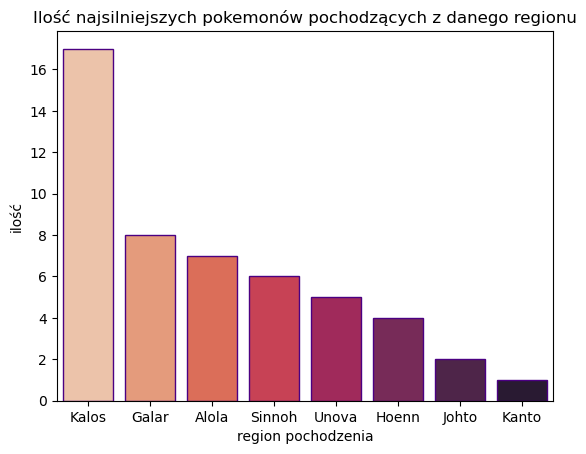

In [69]:
plt.figure()
sns.barplot(x = stat_total_region.index, y = stat_total_region, 
            palette ="rocket_r", ec="indigo")
plt.ylabel("ilość")
plt.xlabel("region pochodzenia")
plt.title("Ilość najsilniejszych pokemonów pochodzących z danego regionu")
plt.show()

Stworzenie macierzy korelacji

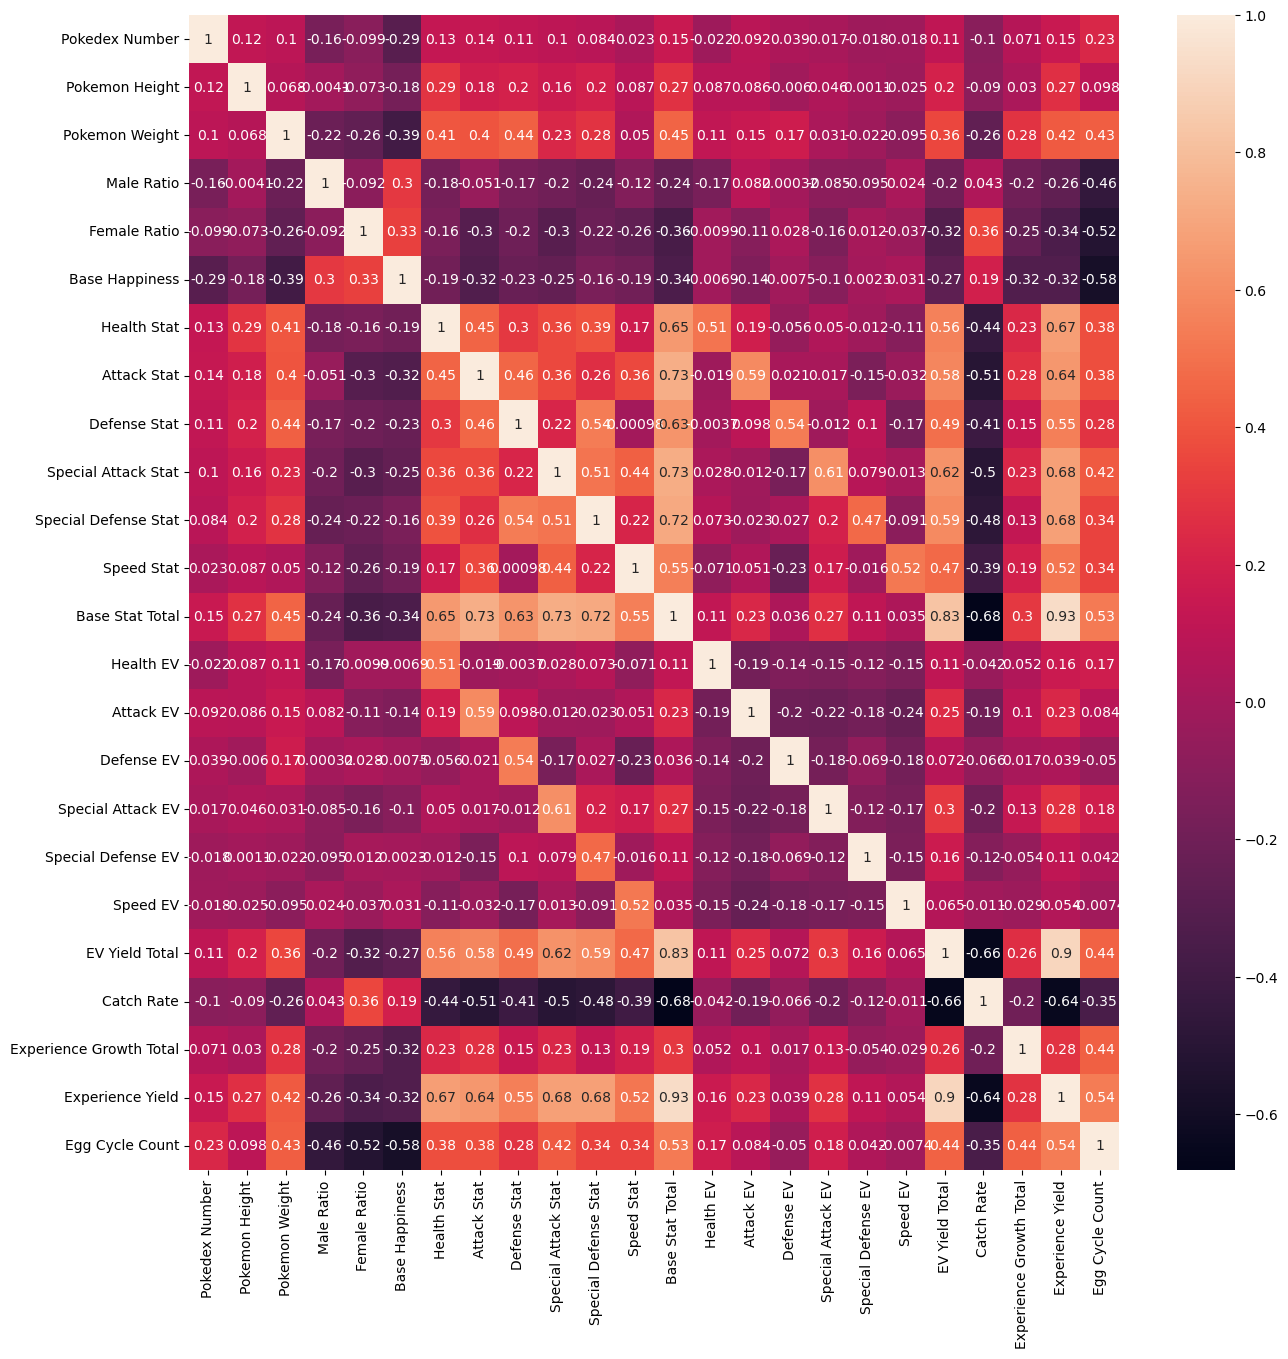

In [70]:
plt.figure(figsize=(15, 15))
sns.heatmap(pokemony_noNA.corr(),annot=True)
plt.show()

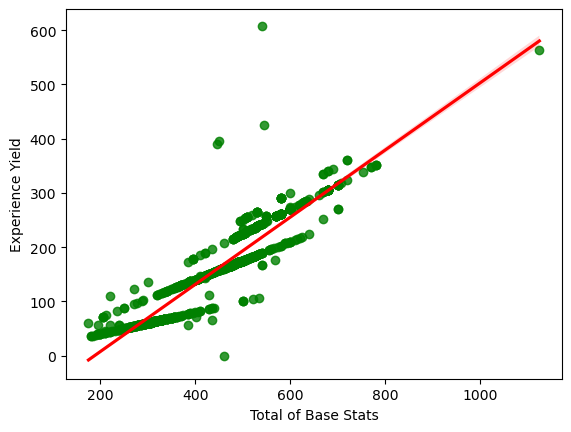

In [71]:
sns.regplot(x=pokemony_noNA['Base Stat Total'], y=pokemony_noNA['Experience Yield'], fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel('Total of Base Stats')
plt.ylabel('Experience Yield')
plt.show()

In [72]:
model=pd.DataFrame(pokemony_noNA[['Base Stat Total','Experience Yield']])
model.rename(columns = {'Base Stat Total':'BST','Experience Yield':'EY'}, inplace = True)
mod=smf.ols(formula='EY ~ BST',data=model)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EY   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     6719.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:11:43   Log-Likelihood:                -5184.0
No. Observations:                1076   AIC:                         1.037e+04
Df Residuals:                    1074   BIC:                         1.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -116.3545      3.455    -33.679      0.000    -123.133    -109.576
BST            0.6192      0.008     81.972      0.000       0.604       0.634
==============================================================================
Omnibus:                      839.340   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57091.015
Skew:                           3.001   Prob(JB):                         0.00
Kurtosis:                      38.177   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dopasowanie modelu do danych jest wysokie. \
y=-116.35+0.62x

Porównanie statystyk wybranych pokemonów.

In [73]:
def Porownanie(p1,p2,p3,p4,p5):
    x = pokemony_noNA[pokemony_noNA["Pokemon Name"] == p1]
    trace1 = go.Scatterpolar(
      r = [x['Health Stat'].values[0],x['Attack Stat'].values[0],x['Defense Stat'].values[0],x['Special Attack Stat'].values[0],x['Special Defense Stat'].values[0],x['Speed Stat'].values[0],x["Health Stat"].values[0]],
      theta = ['Health Stat','Attack Stat','Defense Stat','Special Attack Stat','Special Defense Stat','Speed Stat'],
      fill = 'toself',
      name = p1
    )
    x = pokemony_noNA[pokemony_noNA["Pokemon Name"] == p2]
    trace2 = go.Scatterpolar(
      r = [x['Health Stat'].values[0],x['Attack Stat'].values[0],x['Defense Stat'].values[0],x['Special Attack Stat'].values[0],x['Special Defense Stat'].values[0],x['Speed Stat'].values[0],x["Health Stat"].values[0]],
      theta = ['HP','Attack Stat','Defense Stat','Special Attack Stat','Special Defense Stat','Speed Stat'],
      fill = 'toself',
      name = p2
    )
    x = pokemony_noNA[pokemony_noNA["Pokemon Name"] == p3]
    trace3 = go.Scatterpolar(
      r = [x['Health Stat'].values[0],x['Attack Stat'].values[0],x['Defense Stat'].values[0],x['Special Attack Stat'].values[0],x['Special Defense Stat'].values[0],x['Speed Stat'].values[0],x["Health Stat"].values[0]],
      theta = ['Health Stat','Attack Stat','Defense Stat','Special Attack Stat','Special Defense Stat','Speed Stat'],
      fill = 'toself',
      name = p3
    )
    x = pokemony_noNA[pokemony_noNA["Pokemon Name"] == p4]
    trace4 = go.Scatterpolar(
      r = [x['Health Stat'].values[0],x['Attack Stat'].values[0],x['Defense Stat'].values[0],x['Special Attack Stat'].values[0],x['Special Defense Stat'].values[0],x['Speed Stat'].values[0],x["Health Stat"].values[0]],
      theta = ['Health Stat','Attack Stat','Defense Stat','Special Attack Stat','Special Defense Stat','Speed Stat'],
      fill = 'toself',
      name = p4
    )
    x = pokemony_noNA[pokemony_noNA["Pokemon Name"] == p5]
    trace5 = go.Scatterpolar(
      r = [x['Health Stat'].values[0],x['Attack Stat'].values[0],x['Defense Stat'].values[0],x['Special Attack Stat'].values[0],x['Special Defense Stat'].values[0],x['Speed Stat'].values[0],x["Health Stat"].values[0]],
      theta = ['Health Stat','Attack Stat','Defense Stat','Special Attack Stat','Special Defense Stat','Speed Stat'],
      fill = 'toself',
      name = p5
    )
    data = [trace1, trace2, trace3,trace4,trace5]
    fig = go.Figure(data=data)

    iplot(fig)

In [74]:
Porownanie('Eternatus','Rayquaza','Mewtwo','Groudon','Kyogre')